In [39]:
import requests
import pandas as pd
import requests
from io import StringIO
import nltk
import json
import matplotlib.pyplot as plt
import wordcloud
# conda install -c conda-forge wordcloud
# or
# pip install wordcloud

## 1. Get the database
**Choice 1**: Get the database from the API (json format)

In [14]:
db_json = requests.get('https://www.wavefrontshaping.net/api/db').json()

In [15]:
df = pd.DataFrame(db_json['data'])
df.set_index('id', inplace=True)
df.head()

,authors,title,abstract,year,journal,DOI,DOIlink,arxivlink,PDFlink
id,,,,,,,,,
1,I.M. Vellekoop and A.P. Mosk,Focusing coherent light through opaque strongl...,We report focusing of coherent light through o...,2007,Opt. Lett.,10.1364/OL.32.002309,http://dx.doi.org/10.1364/OL.32.002309,http://arxiv.org/abs/cond-mat/0604253,http://ps.nano-cops.com/sites/default/files/Fo...
2,I.M. Vellekoop and A.P. Mosk,Phase control algorithms for focusing light th...,Light propagation in materials with microscopi...,2008,Opt. Commun.,10.1016/j.optcom.2008.02.022,http://dx.doi.org/10.1016/j.optcom.2008.02.022,http://arxiv.org/abs/0710.3295,http://arxiv.org/pdf/0710.3295
3,I.M. Vellekoop and A.P. Mosk,Universal optimal transmission of light throug...,Random scattering of light is what makes mater...,2008,Phys. Rev. Lett.,10.1103/PhysRevLett.101.120601,http://link.aps.org/doi/10.1103/PhysRevLett.10...,http://arxiv.org/abs/0804.2412,http://cops.brillouinzone.com/sites/default/fi...
4,I.M. Vellekoop and C.M. Aegerter,Scattered light fluorescence microscopy: imagi...,A major limitation of any type of microscope i...,2010,Opt. Lett.,10.1364/OL.35.001245,http://dx.doi.org/10.1364/OL.35.001245,None,http://cops.nano-cops.com/sites/default/files/...
5,"E.G. van Putten, I.M. Vellekoop and A.P. Mosk",Spatial amplitude and phase modulation using c...,We present a method for full spatial phase and...,2008,Appl. Opt.,10.1364/AO.47.002076,http://dx.doi.org/10.1364/AO.47.002076,None,http://cops.nano-cops.com/sites/default/files/...


**Choice 2**: Download the .csv file

In [79]:
url = 'https://www.wavefrontshaping.net/publications/csv'

csv = requests.get(url).text
f = StringIO(csv)

In [80]:
df = pd.read_csv(f, index_col = 0)
df.head()

,authors,title,abstract,year,journal,DOI,DOIlink,arxivlink,PDFlink
id,,,,,,,,,
1,I.M. Vellekoop and A.P. Mosk,Focusing coherent light through opaque strongl...,We report focusing of coherent light through o...,2007,Opt. Lett.,10.1364/OL.32.002309,http://dx.doi.org/10.1364/OL.32.002309,http://arxiv.org/abs/cond-mat/0604253,http://ps.nano-cops.com/sites/default/files/Fo...
2,I.M. Vellekoop and A.P. Mosk,Phase control algorithms for focusing light th...,Light propagation in materials with microscopi...,2008,Opt. Commun.,10.1016/j.optcom.2008.02.022,http://dx.doi.org/10.1016/j.optcom.2008.02.022,http://arxiv.org/abs/0710.3295,http://arxiv.org/pdf/0710.3295
3,I.M. Vellekoop and A.P. Mosk,Universal optimal transmission of light throug...,Random scattering of light is what makes mater...,2008,Phys. Rev. Lett.,10.1103/PhysRevLett.101.120601,http://link.aps.org/doi/10.1103/PhysRevLett.10...,http://arxiv.org/abs/0804.2412,http://cops.brillouinzone.com/sites/default/fi...
4,I.M. Vellekoop and C.M. Aegerter,Scattered light fluorescence microscopy: imagi...,A major limitation of any type of microscope i...,2010,Opt. Lett.,10.1364/OL.35.001245,http://dx.doi.org/10.1364/OL.35.001245,NaN,http://cops.nano-cops.com/sites/default/files/...
5,"E.G. van Putten, I.M. Vellekoop and A.P. Mosk",Spatial amplitude and phase modulation using c...,We present a method for full spatial phase and...,2008,Appl. Opt.,10.1364/AO.47.002076,http://dx.doi.org/10.1364/AO.47.002076,NaN,http://cops.nano-cops.com/sites/default/files/...


**Select 2020**

In [81]:
df = df[df['year']  == 2020]

## 2. Get the keywords from the titles and abstracts

In [82]:
import string
def clean(s):
    '''
    remove punctuation and convert to lower case
    '''
    return str(s).translate(str.maketrans('', '', string.punctuation)).lower()

In [83]:
titles = ' '.join(df["title"].apply(clean))
abstracts = ' '.join(df["abstract"].apply(clean))

Use the natural language toolkit (nltk module) to remove stopwords

In [84]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + \
                 ['light', 'optical', 'show', 'media', 'using', 'based', ])

[nltk_data] Downloading package punkt to /home/spopoff/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spopoff/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
title_tokens = [w for w in word_tokenize(titles) if not w in stop_words ]
abstract_tokens = [w for w in word_tokenize(abstracts) if not w in stop_words ]

## 3. Show the data

### 3.1 Histograms

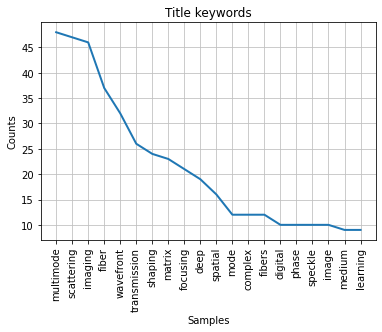

<AxesSubplot:title={'center':'Title keywords'}, xlabel='Samples', ylabel='Counts'>

In [86]:
fd = nltk.FreqDist(title_tokens)
fd.plot(20,cumulative=False, title = 'Title keywords')

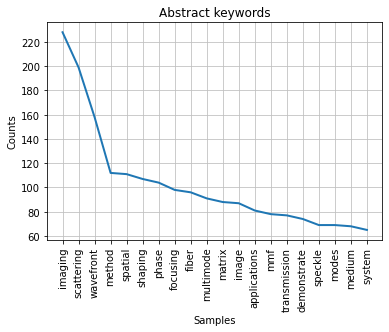

<AxesSubplot:title={'center':'Abstract keywords'}, xlabel='Samples', ylabel='Counts'>

In [87]:
fd = nltk.FreqDist(abstract_tokens)
fd.plot(20,cumulative=False, title = 'Abstract keywords')

### 3.2 Wordclouds

In [89]:
wordcloud_image = wordcloud.WordCloud(
    max_words=100,
    width=500, 
    height=270,
).generate(' '.join(title_tokens))
wordcloud_image.to_file("wordcloud_2020.png")

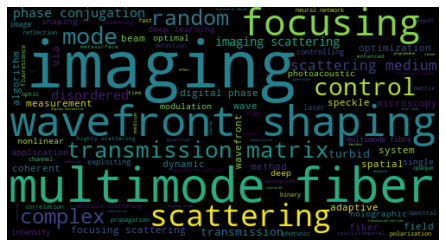

In [69]:
# Display the generated image
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()